In [1]:
import sys
# install dependencies into jupyter
#!{sys.executable} -m pip install matplotlib pandas ipython-flux

# enable flux magic extension
%load_ext flux

In [2]:
%flux http://localhost:8086 --token my-token --timeout 1000000 --org my-org

In [3]:
%%flux my_dataset <<
from(bucket: "my-bucket")
  |> range(start: -30m)
  |> filter(fn: (r) => r["_measurement"] == "cpu")
  |> filter(fn: (r) => r["_field"] == "usage_idle" or r["_field"] == "usage_system" or r["_field"] == "usage_user")  
  |> filter(fn: (r) => r["cpu"] == "cpu-total")
  |> drop(columns: ["_start", "_stop", "_result", "_measurement", "table", "_result"])  
  |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")


* "'http://localhost:8086'"
Returning data to local variable my_dataset


In [4]:
my_dataset

,result,table,_time,cpu,host,usage_idle,usage_system,usage_user
0,_result,0,2022-03-25 07:31:50+00:00,cpu-total,kozel,93.851153,2.549522,3.599325
1,_result,0,2022-03-25 07:32:00+00:00,cpu-total,kozel,92.014995,3.086535,4.898469
2,_result,0,2022-03-25 07:32:10+00:00,cpu-total,kozel,91.722931,2.688172,5.588897
3,_result,0,2022-03-25 07:32:20+00:00,cpu-total,kozel,90.711919,2.525158,6.762923
4,_result,0,2022-03-25 07:32:30+00:00,cpu-total,kozel,92.585646,2.381845,5.032508
...,...,...,...,...,...,...,...,...
175,_result,0,2022-03-25 08:01:00+00:00,cpu-total,kozel,94.150366,2.368602,3.481032
176,_result,0,2022-03-25 08:01:10+00:00,cpu-total,kozel,95.061883,2.062758,2.875359
177,_result,0,2022-03-25 08:01:20+00:00,cpu-total,kozel,93.762890,2.556090,3.681020
178,_result,0,2022-03-25 08:01:30+00:00,cpu-total,kozel,93.543750,2.787500,3.668750


<AxesSubplot:xlabel='_time'>

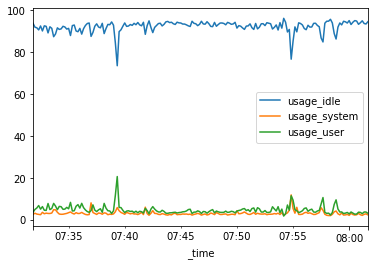

In [5]:
my_dataset.plot.line(x='_time', y=["usage_idle", "usage_system","usage_user"])